In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [21]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Zad
Proszę narysować dane za pomoca 
```python
sns.pairplot()
```

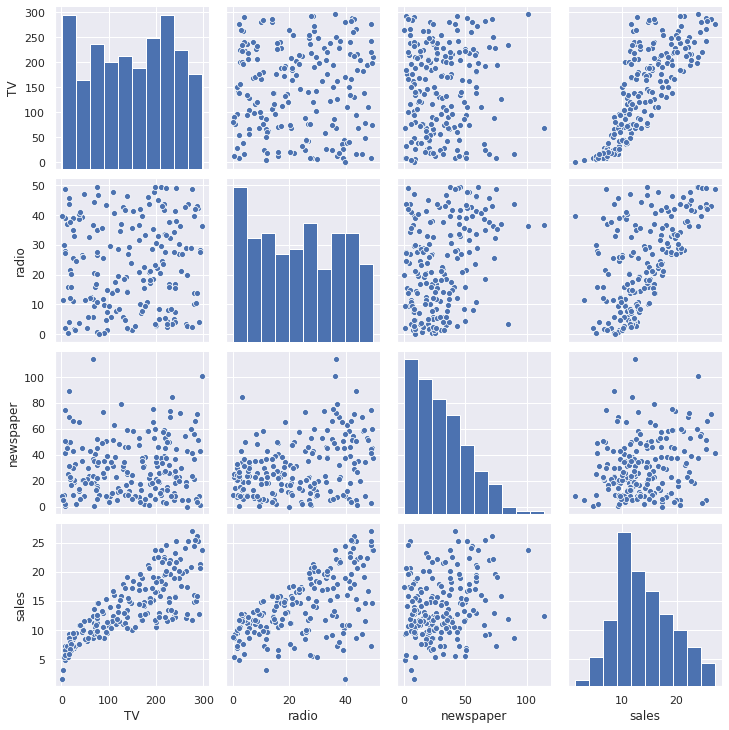

In [22]:
sns.pairplot(df_adv);

# Zad
Proszę wyrysować dane za pomoca 
```python
sns.heatmap()
```

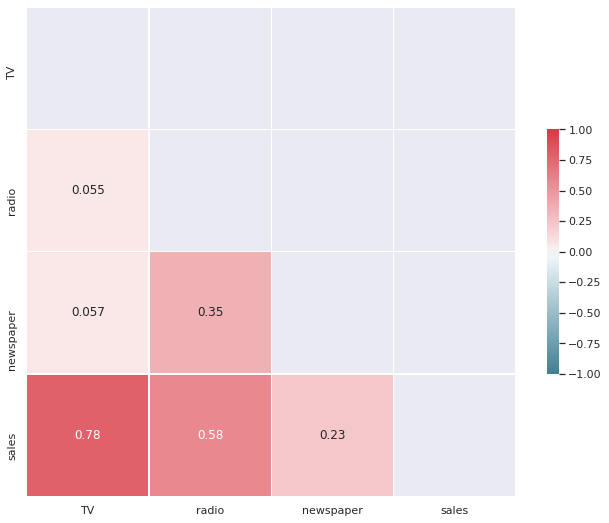

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [23]:
sns.set(style="darkgrid")
corr = df_adv.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data=corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
# sns.heatmap(data=corr)
plt.show()
corr

# Zadanie 1 - Konkurs
Wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.


In [24]:
tmp1 = df_adv.drop('sales', axis=1)
tmp1

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [25]:
tmp2 = df_adv[["sales"]]
tmp2

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [26]:
ee = sm.OLS(tmp2, tmp1).fit()
print(ee.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.982    
Dependent Variable:     sales            AIC:                         853.0824 
Date:                   2020-04-24 23:04 BIC:                         862.9773 
No. Observations:       200              Log-Likelihood:              -423.54  
Df Model:               3                F-statistic:                 3566.    
Df Residuals:           197              Prob (F-statistic):          2.43e-171
R-squared (uncentered): 0.982            Scale:                       4.1068   
------------------------------------------------------------------------------------
               Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
TV             0.0538        0.0013      40.5067      0.0000      0.0512      0.0564
radio          0.2222        0.0094      23.

In [27]:
est = smf.ols(formula='sales ~ TV * radio', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.967    
Dependent Variable: sales            AIC:                548.2778 
Date:               2020-04-24 23:05 BIC:                561.4711 
No. Observations:   200              Log-Likelihood:     -270.14  
Df Model:           3                F-statistic:        1963.    
Df Residuals:       196              Prob (F-statistic): 6.68e-146
R-squared:          0.968            Scale:              0.89022  
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     6.7502     0.2479   27.2328   0.0000   6.2614   7.2391
TV            0.0191     0.0015   12.6990   0.0000   0.0161   0.0221
radio         0.0289     0.0089    3.2408   0.0014   0.0113   0.0464
TV:radio      0.0011     0.0001   20.7266   0.0000   0.0010   0.0012

In [28]:
# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ newspaper + TV * radio', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.967    
Dependent Variable: sales            AIC:                550.0809 
Date:               2020-04-24 23:05 BIC:                566.5725 
No. Observations:   200              Log-Likelihood:     -270.04  
Df Model:           4                F-statistic:        1466.    
Df Residuals:       195              Prob (F-statistic): 2.92e-144
R-squared:          0.968            Scale:              0.89391  
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    6.7284     0.2533   26.5610   0.0000    6.2288   7.2280
newspaper    0.0014     0.0033    0.4383   0.6617   -0.0051   0.0079
TV           0.0191     0.0015   12.6330   0.0000    0.0161   0.0220
radio        0.0280     0.0091    3.0622   0.0025    0.0100   0.0460

In [29]:
est = smf.ols(formula='sales ~ TV * radio + I(TV**2)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.986    
Dependent Variable: sales            AIC:                383.7185 
Date:               2020-04-24 23:05 BIC:                400.2101 
No. Observations:   200              Log-Likelihood:     -186.86  
Df Model:           4                F-statistic:        3432.    
Df Residuals:       195              Prob (F-statistic): 1.79e-179
R-squared:          0.986            Scale:              0.38908  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      5.1371    0.1927   26.6629  0.0000   4.7571   5.5170
TV             0.0509    0.0022   22.8098  0.0000   0.0465   0.0553
radio          0.0352    0.0059    5.9591  0.0000   0.0235   0.0468
TV:radio       0.0011    0.0000   31.0610  0.0000   0.0010   0.0011
I(TV *

In [30]:
est = smf.ols(formula='sales ~ TV * radio * I(TV**2)', data=df_adv).fit()
print((est.summary2()))

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.991    
Dependent Variable:  sales            AIC:                298.9723 
Date:                2020-04-24 23:05 BIC:                325.3589 
No. Observations:    200              Log-Likelihood:     -141.49  
Df Model:            7                F-statistic:        3055.    
Df Residuals:        192              Prob (F-statistic): 3.73e-193
R-squared:           0.991            Scale:              0.25103  
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            4.2760   0.2665 16.0469 0.0000  3.7504  4.8016
TV                   0.0858   0.0076 11.2272 0.0000  0.0707  0.1009
radio                0.0331   0.0091  3.6439 0.0003  0.0152  0.0511
TV:radio             0.0012   0.0003  4.5523 0.0000  0.0007  0.001

In [31]:
est = smf.ols(formula='sales ~ TV * radio * I(TV**2) - radio:I(TV ** 2) - TV:radio:I(TV ** 2)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.991    
Dependent Variable: sales            AIC:                298.3090 
Date:               2020-04-24 23:05 BIC:                318.0989 
No. Observations:   200              Log-Likelihood:     -143.15  
Df Model:           5                F-statistic:        4250.    
Df Residuals:       194              Prob (F-statistic): 4.36e-196
R-squared:          0.991            Scale:              0.25262  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          4.0610   0.1871  21.7095 0.0000  3.6920  4.4299
TV                 0.0900   0.0042  21.4583 0.0000  0.0817  0.0983
radio              0.0421   0.0048   8.7606 0.0000  0.0326  0.0515
TV:radio           0.0010   0.0000  37.1287 0.0000  0.0010  0.0011
I(TV ** 2)   

In [32]:
est = smf.ols(formula='sales ~ TV * radio * I(TV**2) + I(TV**4):radio - radio', data=df_adv).fit()
print((est.summary2()))

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.993    
Dependent Variable:  sales            AIC:                254.6326 
Date:                2020-04-24 23:06 BIC:                281.0191 
No. Observations:    200              Log-Likelihood:     -119.32  
Df Model:            7                F-statistic:        3821.    
Df Residuals:        192              Prob (F-statistic): 2.14e-202
R-squared:           0.993            Scale:              0.20111  
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            4.5011   0.1426 31.5689 0.0000  4.2198  4.7823
TV                   0.0797   0.0048 16.4543 0.0000  0.0702  0.0893
TV:radio             0.0032   0.0002 16.9569 0.0000  0.0029  0.0036
I(TV ** 2)          -0.0004   0.0000 -8.8041 0.0000 -0.0005 -0.000

In [72]:
est = smf.ols(formula='sales ~ np.log(TV) + np.square(radio)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.890   
Dependent Variable: sales            AIC:                790.6168
Date:               2020-04-24 23:14 BIC:                800.5117
No. Observations:   200              Log-Likelihood:     -392.31 
Df Model:           2                F-statistic:        802.8   
Df Residuals:       197              Prob (F-statistic): 1.99e-95
R-squared:          0.891            Scale:              3.0051  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -7.4465   0.5992 -12.4273 0.0000 -8.6282 -6.2649
np.log(TV)        3.9364   0.1222  32.2037 0.0000  3.6954  4.1775
np.square(radio)  0.0040   0.0002  24.2295 0.0000  0.0037  0.0044
-----------------------------------------------------------------
Omnibus:               0.54